<a href="https://colab.research.google.com/github/muratkakun/Machine-Learning/blob/master/MLQ1(the_most_specific_hypothesis_and_the_most_general_hypothesis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame([
    [0.9, 0.8, 0],
    [0.85, 2.1, 0],
    [1.2, 1.0, 0],
    [2.1, 0.95, 0],
    [3.0, 1.1, 0],
    [3.9, 0.7, 0],
    [4.0, 1.4, 0],
    [4.2, 1.8, 0],
    [2.0, 2.3, 0],
    [3.0, 2.3, 0],
    [1.5, 1.8, 1],
    [2.0, 1.5, 1],
    [2.2, 2.0, 1],
    [2.4, 1.4, 1],
    [2.7, 1.85, 1],
    [2.7, 1.85, 1]
    ],columns=['Feature1', 'Feature2', 'Result'])

In [0]:
def Method1():
   

    #df['F1RoundDown'] = df['Feature1'].apply(np.floor)
    #df['F2RoundDown'] = df['Feature2'].apply(np.floor)

    df['F1RoundUp'] = df['Feature1'].round(decimals=0)
    df['F2RoundUp'] = df['Feature2'].round(decimals=0)

    cols = ['F1RoundUp', 'F2RoundUp']
    df[cols] = df[cols].applymap(np.int64)


    f1_unique_count = df.F1RoundUp.unique().size
    f2_unique_count = df.F2RoundUp.unique().size
    #print(df.F1RoundUp.unique())
    #print(df.F2RoundUp.unique())

    f1_new = df[df['Result'] == 1]['F1RoundUp'].values[0]
    f2_new = df[df['Result'] == 1]['F2RoundUp'].values[0]

    dfh = pd.DataFrame([[f1_new, f2_new]], columns=['F1', 'F2'])
    dfh['F1'] = dfh['F1'].round(decimals=1)
    dfh['F2'] = dfh['F2'].round(decimals=1)


    print("-------------------------------")

    i = 0
    for index, row in df[df['Result'] == 1].iterrows():

        if i == 0:
          i=1;
          continue

        f1_new = '?'
        f2_new = '?'

        if row['F1RoundUp'] ==  dfh['F1'].values[i - 1] :
          f1_new = pd.to_numeric(row['F1RoundUp'])


        if row['F2RoundUp'] == dfh['F2'].values[i - 1]:
          f2_new = pd.to_numeric(row['F2RoundUp'])

        dfh = dfh.append({'F1' : f1_new , 'F2' : f2_new} , ignore_index=True)

        i = i + 1

    print(df[df['Result'] == 1])
    print(dfh)

    print(dfh.tail(1))

    hypotes_space = f1_unique_count*f2_unique_count
    print("Hypotes Space = ", hypotes_space)

    #print("S = ", dfh.columns[~dfh.isin(['?']).any()]) 

    new_dfh = dfh[dfh.eq('?').any(1)]


    def count_values_in_range(series):
        return  (series == '?').sum()

    new_dfh['Count'] = new_dfh.apply(
        func=lambda row: count_values_in_range(row), axis=1)

    indx_max = new_dfh['Count'].idxmax()

    indx_min = new_dfh['Count'].idxmin()


    print("max = ", indx_max)
    print("min = ", indx_min)
    print(new_dfh)



    #print(dfh)
    print("---------------G----------------")
    print(dfh.loc[[indx_max]])
    print("---------------G----------------")
    print("********************************")
    print("---------------S----------------")
    print(dfh.loc[[indx_min]])
    print("---------------S----------------")

In [0]:

def Method2():
   
  plt.scatter('Feature1', 'Feature2', data=df)
  plt.xlabel('Feature1')
  plt.ylabel('Feature2')
  plt.show()
   # 'Result'

In [0]:
from matplotlib.patches import Rectangle
def Draw():
  colors = {0:'r', 1:'g'}
  
  fig, ax = plt.subplots()

  for i in range(len(df['Feature1'])):
      ax.scatter(df['Feature1'][i], df['Feature2'][i],color=colors[df['Result'][i]])

  ax.set_title('Data')
  ax.set_xlabel('Feature1')
  ax.set_ylabel('Feature2')
 

In [0]:

def DrawRec():
  shift = 0.05      
  positive_val = df[df['Result'] == 1] 
  negative_val = df[df['Result'] == 0] 
  
  f1 = np.linspace(positive_val.Feature1.min()-shift,       
                     positive_val.Feature1.max() + shift)
   
  plt.gca().fill_between(f1, 
                       positive_val.Feature2.min() - shift, 
                       positive_val.Feature2.max() + shift, 
                       where=None,facecolor='g', alpha=0.2)
  
  f2 = np.linspace(negative_val[negative_val.Feature1<=positive_val.Feature1.min()].Feature1.max() + shift,       
                     negative_val[negative_val.Feature1>=positive_val.Feature1.max()].Feature1.min() -shift)
   
  plt.gca().fill_between(f2, 
                       negative_val[negative_val.Feature2<=positive_val.Feature2.min()].Feature2.max(), 
                       negative_val[negative_val.Feature2>=positive_val.Feature2.max()].Feature2.min() , 
                       where=None,facecolor='r', alpha=0.2)

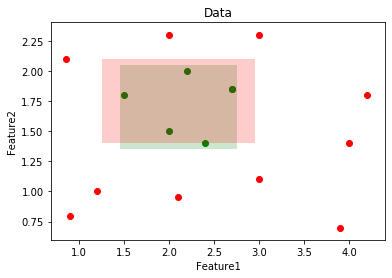

In [0]:
Draw()
DrawRec()

# New Section